In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("cleaned_imdb_dataset.csv")

In [3]:
df.shape
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [4]:
X = df[['Votes','Rating','Runtime (Minutes)','Metascore','Year']].values
y = df['Revenue (Millions)'].values

In [5]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [6]:
n_samples, n_features = X.shape
beta = np.zeros(n_features)

In [7]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
def gradient_descent(X, y, learning_rate, iterations):
    
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    cost_history = []
    
    for i in range(iterations):
        
        y_pred = X @ beta
        error = y_pred - y
        
        gradient = (1/n_samples) * (X.T @ error)
        beta = beta - learning_rate * gradient
        
        cost = np.mean(error**2)
        cost_history.append(cost)
    
    return beta, cost_history

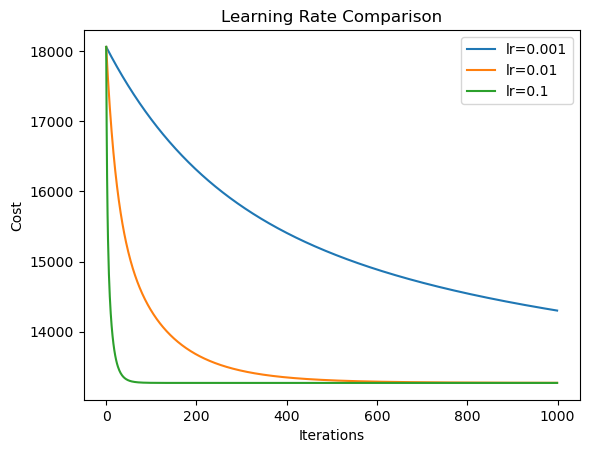

In [9]:
learning_rates = [0.001, 0.01, 0.1]
iterations = 1000

for lr in learning_rates:
    
    beta, cost_history = gradient_descent(X_scaled, y, lr, iterations)
    
    plt.plot(cost_history, label=f"lr={lr}")

plt.title("Learning Rate Comparison")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [10]:
best_lr = 0.01   # jo best nikla ho
beta, cost_history = gradient_descent(X_scaled, y, best_lr, 1000)

In [11]:
y_pred = X_scaled.dot(beta)

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R2 Score:", r2)

R2 Score: -0.21615326048136896


In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 13269.98501685616


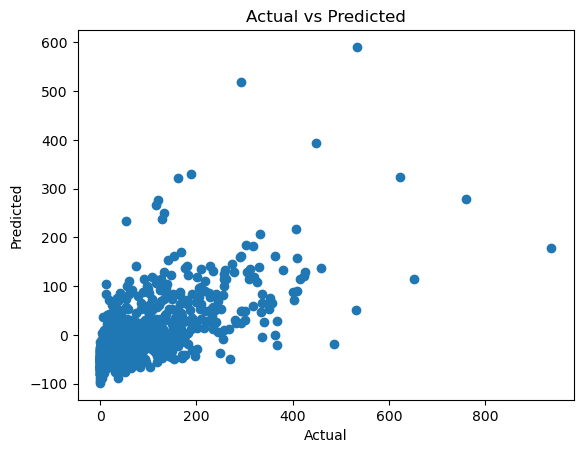

In [14]:
plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

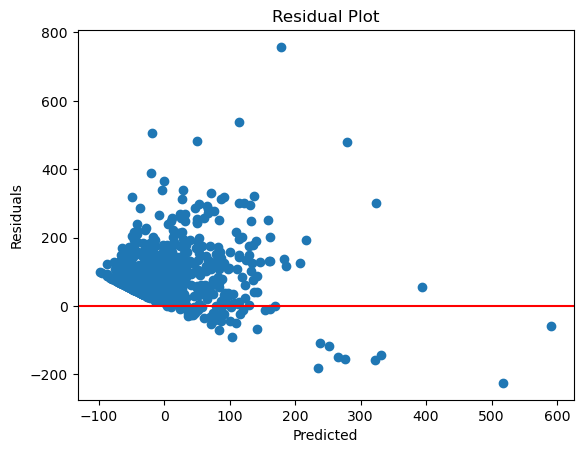

In [15]:
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [16]:
mse = np.mean((y - y_pred)**2)

y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)

r2 = 1 - (ss_residual / ss_total)

print("MSE:", mse)
print("R2:", r2)

MSE: 13269.98501685616
R2: -0.21615326048136896
